## AI2000- Foundations of Machine Learning
## Assignment 1
### Tanmay Goyal
### AI20BTECH11021

#### 1. $k-NN$ Classifiers


#### a)  What happens to the training error when the neighbour size $k$ varies from $n$ to 1?
Answer: As the neighbour size $k$ varies from $n$ to 1, the training error tends to decrease. This is because for $k=1$, each training sample would get classified as itself, since the single point closest to a point is itself. Thus, the training error for a $1-NN$ model would be zero. As the value of $k$ would increase, we start taking into consideration points in the vicinity of the sample, and thus the error tends to creep in, since it might so happen that a class-1 point in the vicinity of class-2 points gets classified as a class-2 point. Outliers would contribute to the training error.

#### b) What happens to the generalisation error as k varies?
Answer: For $k=1$ , the model tends to overfit the decision boundaries, since it takes into consideration the first nearest neighbour only. Thus, the generalisation error tends to be high for $k=1$. As the value of $k$ increases, more points are taken into consideration, and the decision boundaries tend to smoothen out, as we now tend to average over more data. This leads to a decrease in the generalisation error. The generalisation error tends to decrease till a certain value of $k$, after which it would again start increasing, as it starts including points from other classes.

![alt text](Generalisation_error_vs_K.png "Generalisation error vs K for KNN Models")


#### c) Give two reasons why $k-NN$ is undesirable when input dimension is high.
Answer:
1) Because the $k-NN$ model depends on data points of same classes being close enough to one another, it also hinges on the fact that these points are close in every dimension. As the number of dimensions increase, it is difficult to guarantee this fact. It may so happen that the distance between two points in one or two dimensions may outweigh the distances in the rest of the dimensions, thus making $k-NN$ lose its predictive power.
2) As the size of our dataset grows, more dimensions would lead to intensive calculations. Since the distance between every pair of points has to be calculated, and the distance between two points involves the calculation of the square of the differences of the coordinates in each dimension, the number of computations would increase at a rapid rate for higher dimensional data, and massive datasets.

#### d) Is it possible to build a univariate decision tree (with decisions of the form $x>a$ or $y>b$) which classifies similar to a $1- NN$ model?
Answer: 
It depends on the data. When the decision tree makes univariate decisions like $x>a$ or $y>b$, then the decision boundaries are parallel to the axes. The decision boundaries between points in a $1-NN$ diagram can be parallel to the axes or can be sloped lines. If the decision boundaries between points are parallel to the axes, for example, in the case of datapoints {(0,0) , (2,0) , (2,2) , (0,2)}, we can make the decisions using a decision tree. However, in the other case, we would not be able to assign any real constant in the univariate decision making process. For example, in {(0,0) , (2,0) , (1,1)}, our first decision can be if $x>1$. If yes, then to make a decision, we would have to consider $y$. However, since the line is sloped, $y$ becomes a function of $x$, and there is no one fixed constant we can take to make a decision. For every single test point, this parametre $y$ to classify it into one of the classes now becomes variable, and hence, we cannot incorporate it into a decision tree.
Given below are the graphs representing the two examples.

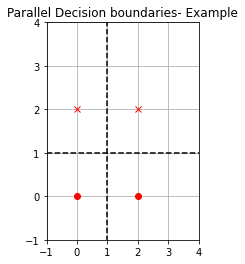

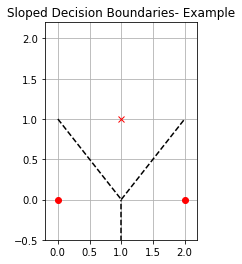

In [65]:
# Graphs for the examples mentioned above

import matplotlib.pyplot as plt
import numpy as np

plt.subplot(1,2,1)
plt.plot([0,2],[0,0], 'ro' )
plt.plot([2,0] , [2, 2] , 'rx')
plt.plot([1 for i in range(-10 ,10)] , [i for i in range(-10,10)] , 'k--')
plt.plot([i for i in range(-10,10)] , [1 for i in range(-10,10)] , 'k--')
plt.title("Parallel Decision boundaries- Example")
plt.xlim(-1,4)
plt.ylim(-1,4)
plt.grid(True)
plt.show()

plt.subplot(1,2,2)
plt.plot([0,2] , [0,0] , 'ro') 
plt.plot(1,1, 'rx')
plt.plot([1 for i in range(-1 , 1)] , [i for i in range(-1,1)] , 'k--')
plt.plot([i for i in range(2)] , [-i+1 for i in range(2)] , 'k--')
plt.plot([i for i in range(1,3)] , [i-1 for i in range(1,3)] , 'k--')
plt.xlim(-0.2,2.2)
plt.ylim(-0.5,2.2)
plt.grid(True)
plt.title("Sloped Decision Boundaries- Example")
plt.show()

#### 2. Bayes Classifier

#### a) A training set consists of one dimensional examples from two classes. Class 1 consists of ${\{0.5, 0.1, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.35, 0.25\}}$ with variance $0.0149$ and class 2 consists of ${\{0.9, 0.8, 0.75, 1.0\}}$ with variance $0.0092$. Estimate the class probabilities $p_1$ and $p_2$. Also find the probability that the test point $x = 0.6$ belongs to class 1.

Answer: 
Since there are $14$ training samples out of which $10$ belong to class 1 and $4$ belong to class 2:

$p_1 = \frac{10}{14}$ and $p_2 = \frac{4}{14}$

Now, mean of all samples in class 1 = $\frac{0.5 + 0.1 + 0.2 + 0.4 + 0.3 + 0.2 + 0.2 + 0.1 + 0.35 + 0.25}{10} = 0.26$

Mean of all samples in class 2 = $\frac{0.9 + 0.8 + 0.75 + 1}{4} = 0.8625$

We assume a Gaussian distribution: $p(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$ where $f$ is the PDF, $\mu$ = mean and $\sigma^2$ = variance of the data.

Therefore, we get:
$p(x = x_i | class1) = \frac{1}{\sqrt{2\pi (0.0149)}} e^{-\frac{(x_i - 0.26)^2}{2(0.0149)}}  = \frac{1}{\sqrt{0.0298\pi}} e^{-\frac{(x_i - 0.26)^2}{0.0298}} $

Similarly, $p(x = x_i | class2) = \frac{1}{\sqrt{2\pi (0.0092)}} e^{-\frac{(x_i - 0.8625)^2}{2(0.0092)}}  = \frac{1}{\sqrt{0.0184\pi}} e^{-\frac{(x_i - 0.8625)^2}{0.0184}} $

To find: $p(class1 | x = 0.6)$

Using Bayes' Theorem, we can write 

$p(class1| x = 0.6) = \frac{p(x = 0.6 | class1)p_1}{p(x = 0.6 | class1)p_1 + p(x = 0.6 | class2)p_2}$

where

$p(x = 0.6 | class1) = \frac{1}{\sqrt{0.0298\pi}} e^{-\frac{(0.6 - 0.26)^2}{0.0298}} = 0.0675$

and 

$p(x = 0.6 | class2) = \frac{1}{\sqrt{0.0184\pi}} e^{-\frac{(0.6 - 0.8625)^2}{0.0184}} = 0.0983$

Subsitututing the values, we get:

$p(class1| x = 0.6) = \frac{0.0675 \times \frac{10}{14}}{0.0675 \times \frac{10}{14} + 0.0983 \times \frac{4}{14}} = 0.6319$

Thus, the required probability is $0.6319$

#### b) Text Classifier- Every document is classified as $sport$ or $politics$. The following is the row vector of attributes:
$ x = {(goal,football,golf,defence,offence,wicket,office,strategy)}$
#### The training data is:
$x_{politics} = \begin{matrix} 
1& 0& 1& 1& 1& 0& 1& 1\\
0& 0& 0& 1& 0& 0& 1& 1\\
1& 0& 0& 1& 1& 0& 1& 0\\
0& 1& 0& 0& 1& 1& 0& 1\\
0& 0& 0& 1& 1& 0& 1& 1\\
0& 0& 0& 1& 1& 0& 0& 1\\
\end{matrix}$

$x_{sport} = \begin{matrix}
1& 1& 0& 0& 0& 0& 0& 0\\
0& 0& 1& 0& 0& 0& 0& 0\\
1& 1& 0& 1& 0& 0& 0& 0\\
1& 1& 0& 1& 0& 0& 0& 1\\
1& 1& 0& 1& 1& 0& 0& 0\\
0& 0& 0& 1& 0& 1& 0& 0\\
\end{matrix}$
    
#### Find the probability that document $x = {(1,0,0,1,1,1,1,0)}$ is about $politics$.    
    
    
Answer: Let the attributes be represented by $A$. Then we have to find $p(politics | A)$. 

Using Bayes' Theorem:
$p(politics | A) = \frac{p(A|politics)p(politics)}{p(A)} = \frac{p(A|politics)p(politics)}{p(A|politics)p(politics) + p(A|sport)p(sport)}$

We see that $A$ requires us to have a $1$ in the 7th column. However, in $x_{sport}$, we see that none of the documents consist of a $1$ in the 7th column. Therefore, while finding $p(A|sport)$, we would get $0$. Thus, our required probability reduces to :

$p(politics | A) = \frac{p(A|politics)p(politics)}{p(A|politics)p(politics) + p(A|sport)p(sport)} = \frac{p(A|politics)p(politics)}{p(A|politics)p(politics) + 0} = 1$

Thus, the required probability is $1$.


#### Decision Trees

### FYI, a more updated and correct version of the code given below is in Assignment3

In [70]:
# FoML Assign 1 Code Skeleton
# Please use this outline to implement your decision tree. You can add any code around this.

import numpy as np
import csv 
import math 
MAX_DEPTH = 100
# Enter You Name Here
myname = "Tanmay-Goyal" # or "Amar-Akbar-Antony"

# Implement your decision tree below
#class DecisionTree:
class DecisionNode:

    def __init__(self,depth):
        self.is_terminal_node = False
        self.left = None
        self.right = None
        self.split_index = None
        self.split_threshold = None
        self.label = None
        self.depth = depth
        pass

    def train(self,X,y):
        # self.label = majority label of training data
        
        ones = np.count_nonzero(y==1)
        zeros = np.count_nonzero(y==0)
        if ones>zeros:
            self.label = 1
        else:
            self.label = 0 
        # If max depth reached, just stop ->is_terminal_node = True
        if self.depth == MAX_DEPTH:
            is_terminal_node = True
        # Calculate initial entropy
        entropy_init = entropy(y)
        
        # If initial entropy>0.1 -> Find your best split -> splitindex,threshold 
        if entropy_init>0.1:
            entropy_max = 100
            # looping over all attributes
            X_yes_final = []
            y_yes_final = []
            X_no_final  = []
            y_no_final = []
            for column in range(len(X[0])):
                maxi = np.max(X[: , column])
                mini = np.min(X[: , column])    
                potential_thresholds = np.linspace(mini, maxi , 20)
                # looping over all thresholds
                for t in potential_thresholds:
                    yes = np.where(X[: , column]>=t)[0] # greater than threshold
                    no = np.where(X[: , column]<t)[0]   # lesser than threshold
                    if len(yes)==0 or len(no)==0:
                        continue
                    
                    y_yes = np.array([y[i] for i in yes])
                    y_no = np.array([y[i] for i in no])
                    total = len(y_yes) + len(y_no)
                    entropy_yes = entropy(y_yes)
                    entropy_no = entropy(y_no)
                    
                    entropy_final = (len(y_yes)/total)*entropy_yes + (len(y_no)/total)*entropy_no
                    # maximising information gain -> minimising entropy
                    if entropy_final<entropy_max:
                            self.split_index = column
                            self.split_threshold = t
                            entropy_max = entropy_final
                            X_yes_final = np.array([X[i] for i in yes])
                            X_no_final = np.array([X[i] for i in no] )  
                            y_yes_final = np.array([y[i] for i in yes])
                            y_no_final = np.array([y[i] for i in no])
                            
        
            # assuming left path corresponds to data greater than threshold
            l = DecisionNode(self.depth+1)
            self.left = l
            r = DecisionNode(self.depth+1)
            self.right = r
            
            l.train(X_yes_final , y_yes_final)
            r.train(X_no_final , y_no_final)
        
        else:
            self.is_terminal_node = True

    # implement this function
    def classify(self, test_instance):
        result = 0 # baseline: always classifies as 0
        
        if(self.is_terminal_node==True):
            return self.label
        else:
            if test_instance[self.split_index]>=self.split_threshold:
                self.left.classify(test_instance)
            else:
                self.right.classify(test_instance)
                
        return result

def entropy(y):
    ones = np.count_nonzero(y==1)/len(y)

    zeros = np.count_nonzero(y==0)/len(y)
    
    if ones==0 or zeros==0:
        entropy = 0
    else:
        entropy = ones*math.log2(ones) + zeros * math.log2(zeros)
    return -entropy
    
def run_decision_tree():
    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = np.array([tuple(line) for line in csv.reader(f, delimiter=",")]).astype(float)
    print ("Number of records: %d" % len(data))


    # Split training/test sets
    # You need to modify the following code for cross validation.
    sum_accuracy = 0
    K = 10
    for j in range(K):
        training_set = np.array([x for i, x in enumerate(data) if i % K != j])
        test_set = np.array([x for i, x in enumerate(data) if i % K == j])
    
        train_x =training_set[:,:-1]
        train_y = training_set[:,-1].astype(int)
        test_x = test_set[: , :-1]
        test_y = test_set[: , -1].astype(int)

        
        tree = DecisionNode(0)
        # Construct a tree using training set
        
        tree.train( train_x , train_y )
        #print("trained" , j)
    
        # Classify the test set using the tree we just constructed
        results = []
        for instance in test_set:
            result = tree.classify( instance[:-1] )
            results.append( result == instance[-1])
        #print(results)
        
        # Accuracy
        
        accuracy = float(results.count(True))/float(len(results))
        print ("accuracy: %.4f" % accuracy)
        sum_accuracy+=accuracy
        
        
    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "w")
    f.write("accuracy: %.4f" % (sum_accuracy/K))
    f.close()
    print("final accuracy: %.4f" % (sum_accuracy/K))
    
        
if __name__ == "__main__":
    run_decision_tree()


Number of records: 4898
accuracy: 0.7878
accuracy: 0.8082
accuracy: 0.7796
accuracy: 0.7694
accuracy: 0.7755
accuracy: 0.7857
accuracy: 0.7939
accuracy: 0.7714
accuracy: 0.7812
accuracy: 0.7832
final accuracy: 0.7836


#### Improving the Decision Tree (Gini Index)

Gini Index usually lies in the range of $(0,0.5)$ while entropy lies between $0$ and $1$. Thus, Gini Index tends to penalise impurities lesser than what entropy does. Also, Gini Index is computationally better since it does not require computing logarithms.

In [71]:
# FoML Assign 1 Code Skeleton
# Please use this outline to implement your decision tree. You can add any code around this.

import numpy as np
import csv 
import math 
MAX_DEPTH = 100
# Enter You Name Here
myname = "Tanmay-Goyal" # or "Amar-Akbar-Antony"

# Implement your decision tree below
#class DecisionTree:
class DecisionNode:

    def __init__(self,depth):
        self.is_terminal_node = False
        self.left = None
        self.right = None
        self.split_index = None
        self.split_threshold = None
        self.label = None
        self.depth = depth
        pass

    def train(self,X,y):
        # self.label = majority label of training data
        
        ones = np.count_nonzero(y==1)
        zeros = np.count_nonzero(y==0)
        if ones>zeros:
            self.label = 1
        else:
            self.label = 0 
        # If max depth reached, just stop ->is_terminal_node = True
        if self.depth == MAX_DEPTH:
            is_terminal_node = True
        # Calculate initial entropy
        entropy_init = gini_index(y)
        
        
        # If initial entropy>0.1 -> Find your best split -> splitindex,threshold 
        if entropy_init>0.1:
            entropy_max = 100
            # looping over all attributes
            X_yes_final = []
            y_yes_final = []
            X_no_final  = []
            y_no_final = []
            for column in range(len(X[0])):
                maxi = np.max(X[: , column])
                mini = np.min(X[: , column])    
                potential_thresholds = np.linspace(mini, maxi , 20)
                # looping over all thresholds
                for t in potential_thresholds:
                    yes = np.where(X[: , column]>=t)[0] # greater than threshold
                    no = np.where(X[: , column]<t)[0]   # lesser than threshold
                    if len(yes)==0 or len(no)==0:
                        continue
                    
                    y_yes = np.array([y[i] for i in yes])
                    y_no = np.array([y[i] for i in no])
                    total = len(y_yes) + len(y_no)
                    entropy_yes = gini_index(y_yes)
                    entropy_no = gini_index(y_no)
                    
                    entropy_final = (len(y_yes)/total)*entropy_yes + (len(y_no)/total)*entropy_no
                    # maximising information gain -> minimising entropy
                    if entropy_final<entropy_max:
                            self.split_index = column
                            self.split_threshold = t
                            entropy_max = entropy_final
                            X_yes_final = np.array([X[i] for i in yes])
                            X_no_final = np.array([X[i] for i in no] )  
                            y_yes_final = np.array([y[i] for i in yes])
                            y_no_final = np.array([y[i] for i in no])
                            
        
            # assuming left path corresponds to data greater than threshold
            l = DecisionNode(self.depth+1)
            self.left = l
            r = DecisionNode(self.depth+1)
            self.right = r
            
            l.train(X_yes_final , y_yes_final)
            r.train(X_no_final , y_no_final)
        
        else:
            self.is_terminal_node = True

    # implement this function
    def classify(self, test_instance):
        result = 0 # baseline: always classifies as 0
    
        if(self.is_terminal_node==True):
            return self.label
        else:
            if test_instance[self.split_index]>=self.split_threshold:
                self.left.classify(test_instance)
            else:
                self.right.classify(test_instance)
            
        return result

def gini_index(y):
    ones = np.count_nonzero(y==1)/len(y)

    zeros = np.count_nonzero(y==0)/len(y)
    
    return 1 - (ones**2) - (zeros**2)
    
def run_decision_tree():
    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = np.array([tuple(line) for line in csv.reader(f, delimiter=",")]).astype(float)
    print ("Number of records: %d" % len(data))


    # Split training/test sets
    # You need to modify the following code for cross validation.
    sum_accuracy = 0
    K = 10
    for j in range(K):
        training_set = np.array([x for i, x in enumerate(data) if i % K != j])
        test_set = np.array([x for i, x in enumerate(data) if i % K == j])
    
        train_x =training_set[:,:-1]
        train_y = training_set[:,-1].astype(int)
        test_x = test_set[: , :-1]
        test_y = test_set[: , -1].astype(int)

        
        tree = DecisionNode(0)
        # Construct a tree using training set
        
        tree.train( train_x , train_y )
        #print("trained" , j)
    
        # Classify the test set using the tree we just constructed
        results = []
        for instance in test_set:
            result = tree.classify( instance[:-1] )
            results.append( result == instance[-1])
        #print(results)
        
        # Accuracy
        
        accuracy = float(results.count(True))/float(len(results))
        print ("accuracy: %.4f" % accuracy)
        sum_accuracy+=accuracy
        
        
    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "a")
    f.write("\n Improvement using Gini Index")
    f.write("\n accuracy: %.4f" % (sum_accuracy/K))
    f.close()
    print("final accuracy: %.4f" % (sum_accuracy/K))
    
        
if __name__ == "__main__":
    run_decision_tree()


Number of records: 4898
accuracy: 0.7878
accuracy: 0.8082
accuracy: 0.7796
accuracy: 0.7694
accuracy: 0.7755
accuracy: 0.7857
accuracy: 0.7939
accuracy: 0.7714
accuracy: 0.7812
accuracy: 0.7832
final accuracy: 0.7836


#### Improving the Decision Tree (multi-way split)
Multiway splits have the advantage that an attribute closer to the root node would be very rarely repeated down the tree. This makes the trees more easily comprehensible and efficient.

In [89]:
# FoML Assign 1 Code Skeleton
# Please use this outline to implement your decision tree. You can add any code around this.

import numpy as np
import csv 
import math 
MAX_DEPTH = 100
# Enter You Name Here
myname = "Tanmay-Goyal" # or "Amar-Akbar-Antony"

# Implement your decision tree below
#class DecisionTree:
class DecisionNode:

    def __init__(self,depth):
        self.is_terminal_node = False
        #taking 4 splits per node
        self.child1 = None
        self.child2 = None
        self.child3 = None
        self.child4 = None
        self.split_index = None
        self.split_threshold = None
        self.label = None
        self.depth = depth
        pass

    def train(self,X,y):
        # self.label = majority label of training data
        
        ones = np.count_nonzero(y==1)
        zeros = np.count_nonzero(y==0)
        if ones>zeros:
            self.label = 1
        else:
            self.label = 0 
        # If max depth reached, just stop ->is_terminal_node = True
        if self.depth == MAX_DEPTH:
            is_terminal_node = True
        # Calculate initial entropy
        entropy_init = entropy(y)
        
        # If initial entropy>0.1 -> Find your best split -> splitindex,threshold 
        if entropy_init>0.1:
            
            entropy_max = 100
            # looping over all attributes
            Xfinal = []
            yfinal = []
            entropy_sum = 0
            for column in range(len(X[0])):
                maxi = np.max(X[: , column])
                mini = np.min(X[: , column])    
                potential_thresholds = np.linspace(mini, maxi , 5)
                # looping over all thresholds
                for t in range(len(potential_thresholds)-1):
                        yes = np.where((X[: , column]>=potential_thresholds[t]) & (X[: , column]<potential_thresholds[t+1]))
                        y_yes =  np.array([y[i] for i in yes])
                        entropy_yes = entropy(y_yes)
                        entropy_sum += (len(yes)/len(y))*entropy_yes
                
                    # maximising information gain -> minimising entropy
                    
                if entropy_sum<entropy_max:
                            self.split_index = column
                            self.split_threshold = potential_thresholds
                            entropy_max = entropy_sum
                            for t in range(len(potential_thresholds)-1):
                                yes = np.where((X[: , column]>=potential_thresholds[t]) & (X[: , column]<potential_thresholds[t+1]))
                                y_yes =  np.array([y[i] for i in yes])
                                Xfinal.append(np.array([X[i] for i in yes]))
                                yfinal.append(np.array([y[i] for i in yes]))
                            
            c1 = DecisionNode(self.depth+1)
            self.child1 = c1
            c2 = DecisionNode(self.depth+1)
            self.child2 = c2
            c3 = DecisionNode(self.depth+1)
            self.child3 = c3
            c4 = DecisionNode(self.depth+1)
            self.child4 = c4
            
            c1.train(Xfinal[0] , yfinal[0])
            c2.train(Xfinal[1] , yfinal[1])
            c3.train(Xfinal[2] , yfinal[2])
            c4.train(Xfinal[3] , yfinal[3])
        
        else:
            self.is_terminal_node = True
    
    
    
    # implement this function
    def classify(self, test_instance):
        result = 0 # baseline: always classifies as 0
        
        if(self.is_terminal_node==True):
            return self.label
        else:
            if test_instance[self.split_index]>=self.split_threshold[0] and test_instance[self.split_index]<self.split_threshold[1]:
                self.child1.classify(test_instance)
            elif test_instance[self.split_index]>=self.split_threshold[1] and test_instance[self.split_index]<self.split_threshold[2]:
                self.child2.classify(test_instance)
            elif test_instance[self.split_index]>=self.split_threshold[2] and test_instance[self.split_index]<self.split_threshold[3]:
                self.child3.classify(test_instance)
            else:
                self.child4.classify(test_instance)
        return result

def entropy(y):
    ones = np.count_nonzero(y==1)/len(y)

    zeros = np.count_nonzero(y==0)/len(y)
    
    if ones==0 or zeros==0:
        entropy = 0
    else:
        entropy = ones*math.log2(ones) + zeros * math.log2(zeros)
    return -entropy
    
def run_decision_tree():
    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = np.array([tuple(line) for line in csv.reader(f, delimiter=",")]).astype(float)
    print ("Number of records: %d" % len(data))


    # Split training/test sets
    # You need to modify the following code for cross validation.
    sum_accuracy = 0
    K = 10
    for j in range(K):
        training_set = np.array([x for i, x in enumerate(data) if i % K != j])
        test_set = np.array([x for i, x in enumerate(data) if i % K == j])
    
        train_x =training_set[:,:-1]
        train_y = training_set[:,-1].astype(int)
        test_x = test_set[: , :-1]
        test_y = test_set[: , -1].astype(int)

        
        tree = DecisionNode(0)
        # Construct a tree using training set
        
        tree.train( train_x , train_y )
        #print("trained" , j)
    
        # Classify the test set using the tree we just constructed
        results = []
        for instance in test_set:
            result = tree.classify( instance[:-1] )
            results.append( result == instance[-1])
        #print(results)
        
        # Accuracy
        
        accuracy = float(results.count(True))/float(len(results))
        print ("accuracy: %.4f" % accuracy)
        sum_accuracy+=accuracy
        
        
    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "a")
    f.write("\n Improvement using Multi-way split")
    f.write("\n accuracy: %.4f" % (sum_accuracy/K))
    f.close()
    print("final accuracy: %.4f" % (sum_accuracy/K))
    
        
if __name__ == "__main__":
    run_decision_tree()


Number of records: 4898
accuracy: 0.7878
accuracy: 0.8082
accuracy: 0.7796
accuracy: 0.7694
accuracy: 0.7755
accuracy: 0.7857
accuracy: 0.7939
accuracy: 0.7714
accuracy: 0.7812
accuracy: 0.7832
final accuracy: 0.7836
